In [3]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("MI_topics.csv")

In [4]:
df = df.drop('predicted_score', axis=1)

Decision Tree classifier 

In [6]:
# Preprocess the data using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['word_count', 'unique_word_count', 'mean_word_length']),
        ('text', TfidfVectorizer(), 'lemmas')
    ])

# Define the classifier
classifier = DecisionTreeClassifier(random_state=42)

# Combine the preprocessor and the classifier into a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Extract the features and the target variable
X = df.drop('predicted_topic',axis=1)
y = df['predicted_topic']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7752808988764045

Classification Report:
                  precision    recall  f1-score   support

FinanceAnalysis       0.77      0.75      0.76       214
     HomeRetail       0.78      0.80      0.79       231

       accuracy                           0.78       445
      macro avg       0.78      0.77      0.77       445
   weighted avg       0.78      0.78      0.78       445



In [7]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[161  53]
 [ 47 184]]


In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print("\nCross Validation Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))


Cross Validation Score: 0.74 +/- 0.07



ROC AUC Score: 0.7744366225674638


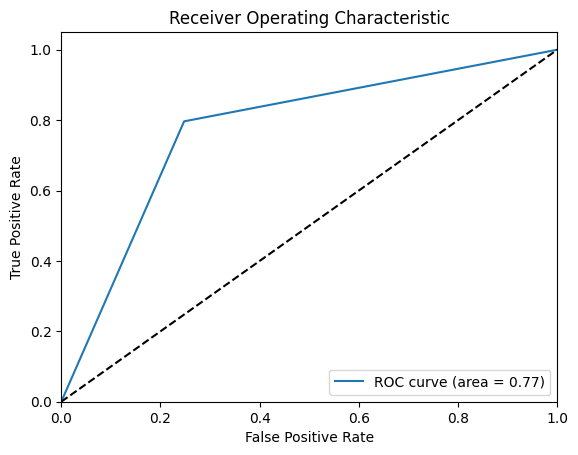

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = pipeline.predict_proba(X_test)[:, 1]

if len(lb.classes_) == 2:  # Only if it's a binary classification problem
    print("\nROC AUC Score:", roc_auc_score(y_test_bin, y_pred_bin))

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


Using count vectorizer insted of Tfidfvectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Preprocess the data using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['word_count', 'unique_word_count', 'mean_word_length']),
        ('text', CountVectorizer(), 'lemmas')
    ])

# Define the classifier
classifier = DecisionTreeClassifier(random_state=42)

# Combine the preprocessor and the classifier into a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Extract the features and the target variable
X = df.drop('predicted_topic',axis=1)
y = df['predicted_topic']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7910112359550562

Classification Report:
                  precision    recall  f1-score   support

FinanceAnalysis       0.78      0.79      0.78       214
     HomeRetail       0.80      0.80      0.80       231

       accuracy                           0.79       445
      macro avg       0.79      0.79      0.79       445
   weighted avg       0.79      0.79      0.79       445



In [15]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[168  46]
 [ 47 184]]


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print("\nCross Validation Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))


Cross Validation Score: 0.72 +/- 0.07



ROC AUC Score: 0.7907917627543796


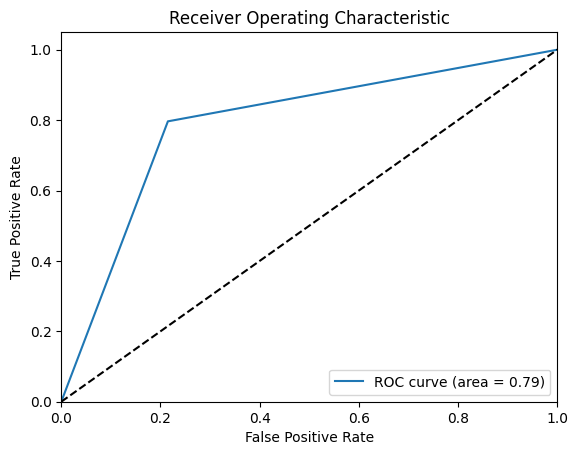

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = pipeline.predict_proba(X_test)[:, 1]

if len(lb.classes_) == 2:  # Only if it's a binary classification problem
    print("\nROC AUC Score:", roc_auc_score(y_test_bin, y_pred_bin))

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Random Forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier


# Preprocess the data using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['word_count', 'unique_word_count', 'mean_word_length']),
        ('text', TfidfVectorizer(), 'lemmas')
    ])

# Define the classifier
classifier = RandomForestClassifier(random_state=42)

# Combine the preprocessor and the classifier into a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Extract the features and the target variable
X = df.drop('predicted_topic', axis=1)
y = df['predicted_topic']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7640449438202247

Classification Report:
                  precision    recall  f1-score   support

FinanceAnalysis       0.72      0.82      0.77       214
     HomeRetail       0.81      0.71      0.76       231

       accuracy                           0.76       445
      macro avg       0.77      0.77      0.76       445
   weighted avg       0.77      0.76      0.76       445



In [20]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[176  38]
 [ 67 164]]


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print("\nCross Validation Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))


Cross Validation Score: 0.70 +/- 0.09



ROC AUC Score: 0.8660739571954525


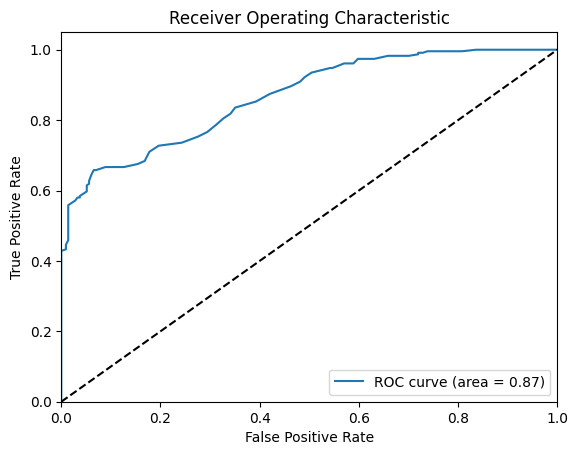

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = pipeline.predict_proba(X_test)[:, 1]

if len(lb.classes_) == 2:  # Only if it's a binary classification problem
    print("\nROC AUC Score:", roc_auc_score(y_test_bin, y_pred_bin))

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Using count vectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Preprocess the data using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['word_count', 'unique_word_count', 'mean_word_length']),
        ('text', CountVectorizer(), 'lemmas')
    ])

# Define the classifier
classifier = RandomForestClassifier(random_state=42)

# Combine the preprocessor and the classifier into a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Extract the features and the target variable
X = df.drop('predicted_topic', axis=1)
y = df['predicted_topic']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.755056179775281

Classification Report:
                  precision    recall  f1-score   support

FinanceAnalysis       0.71      0.84      0.77       214
     HomeRetail       0.82      0.68      0.74       231

       accuracy                           0.76       445
      macro avg       0.76      0.76      0.75       445
   weighted avg       0.76      0.76      0.75       445



In [25]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[179  35]
 [ 74 157]]


In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print("\nCross Validation Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))


Cross Validation Score: 0.71 +/- 0.10



ROC AUC Score: 0.8740745236072339


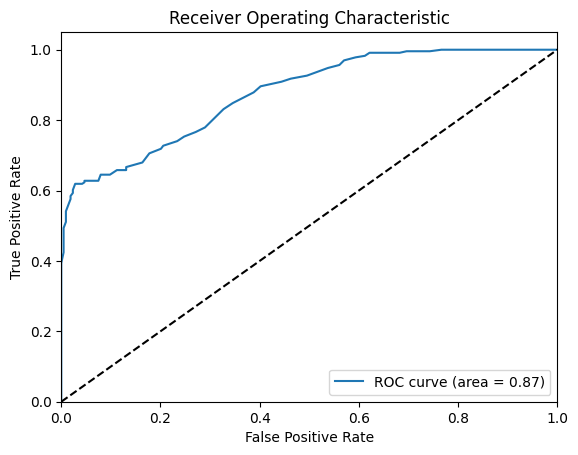

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = pipeline.predict_proba(X_test)[:, 1]

if len(lb.classes_) == 2:  # Only if it's a binary classification problem
    print("\nROC AUC Score:", roc_auc_score(y_test_bin, y_pred_bin))

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Support vector machines SVM classifier 

In [32]:
from sklearn.svm import SVC

# Preprocess the data using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['word_count', 'unique_word_count', 'mean_word_length']),
        ('text', TfidfVectorizer(), 'lemmas')
    ])

# Define the classifier
classifier = SVC(random_state=42, probability=True)  # Note the added `probability=True`

# Combine the preprocessor and the classifier into a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Extract the features and the target variable
X = df.drop('predicted_topic', axis=1)
y = df['predicted_topic']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7393258426966293

Classification Report:
                  precision    recall  f1-score   support

FinanceAnalysis       0.69      0.83      0.75       214
     HomeRetail       0.81      0.65      0.72       231

       accuracy                           0.74       445
      macro avg       0.75      0.74      0.74       445
   weighted avg       0.75      0.74      0.74       445



In [29]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[178  36]
 [ 80 151]]


In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print("\nCross Validation Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))


Cross Validation Score: 0.68 +/- 0.09



ROC AUC Score: 0.8329995549621718


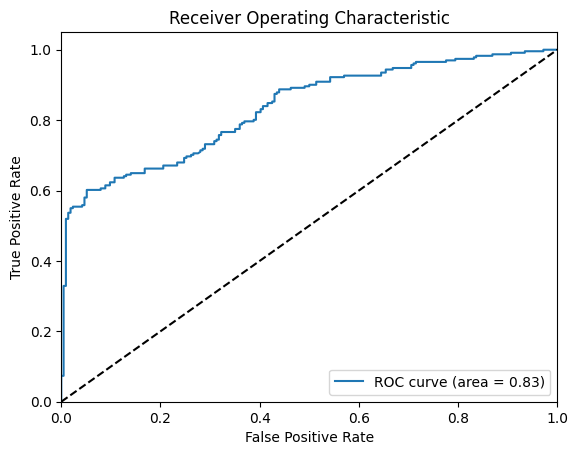

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = pipeline.predict_proba(X_test)[:, 1]

if len(lb.classes_) == 2:  # Only if it's a binary classification problem
    print("\nROC AUC Score:", roc_auc_score(y_test_bin, y_pred_bin))

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Using count vectorizer

In [34]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

# Preprocess the data using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['word_count', 'unique_word_count', 'mean_word_length']),
        ('text', CountVectorizer(), 'lemmas')
    ])

# Define the classifier
classifier = SVC(random_state=42, probability=True)  # Note the added `probability=True`

# Combine the preprocessor and the classifier into a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Extract the features and the target variable
X = df.drop('predicted_topic', axis=1)
y = df['predicted_topic']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7101123595505618

Classification Report:
                  precision    recall  f1-score   support

FinanceAnalysis       0.70      0.69      0.70       214
     HomeRetail       0.72      0.73      0.72       231

       accuracy                           0.71       445
      macro avg       0.71      0.71      0.71       445
   weighted avg       0.71      0.71      0.71       445



In [35]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[147  67]
 [ 62 169]]


In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print("\nCross Validation Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))


Cross Validation Score: 0.68 +/- 0.10



ROC AUC Score: 0.8860905449690497


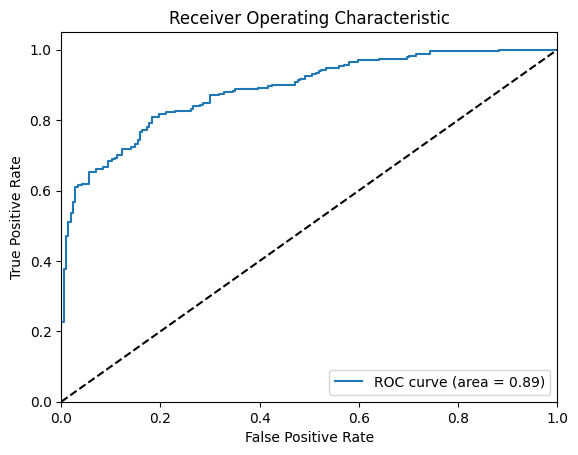

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = pipeline.predict_proba(X_test)[:, 1]

if len(lb.classes_) == 2:  # Only if it's a binary classification problem
    print("\nROC AUC Score:", roc_auc_score(y_test_bin, y_pred_bin))

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

XgBoost

In [39]:
from xgboost import XGBClassifier

# Preprocess the data using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['word_count', 'unique_word_count', 'mean_word_length']),
        ('text', TfidfVectorizer(), 'lemmas')
    ])

# Define the classifier
classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Combine the preprocessor and the classifier into a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Extract the features and the target variable
X = df.drop('predicted_topic', axis=1)
y = df['predicted_topic']

# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Decode the predicted labels
y_pred_decoded = encoder.inverse_transform(y_pred)

# Decode the true labels
y_test_decoded = encoder.inverse_transform(y_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded))

Accuracy: 0.7932584269662921

Classification Report:
                  precision    recall  f1-score   support

FinanceAnalysis       0.76      0.84      0.80       214
     HomeRetail       0.84      0.75      0.79       231

       accuracy                           0.79       445
      macro avg       0.80      0.80      0.79       445
   weighted avg       0.80      0.79      0.79       445



In [40]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[180  34]
 [ 58 173]]


In [42]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score

# Binarize the labels
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Run cross-validation
scores = cross_val_score(pipeline, X, y_bin, cv=5)

print("\nCross Validation Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))



Cross Validation Score: 0.76 +/- 0.08



ROC AUC Score: 0.8860905449690497


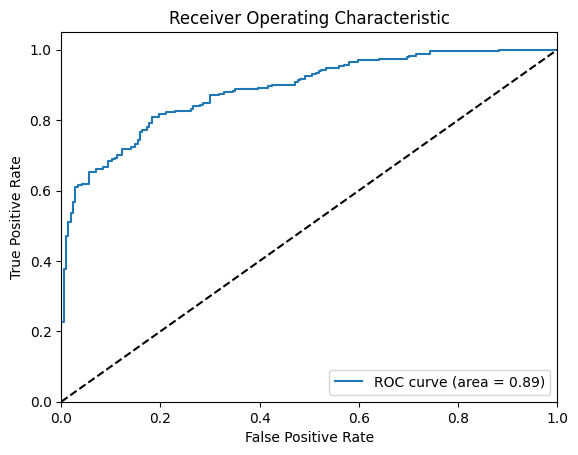

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = pipeline.predict_proba(X_test)[:, 1]

if len(lb.classes_) == 2:  # Only if it's a binary classification problem
    print("\nROC AUC Score:", roc_auc_score(y_test_bin, y_pred_bin))

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Using count vectorizer 

In [46]:
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Preprocess the data using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['word_count', 'unique_word_count', 'mean_word_length']),
        ('text', CountVectorizer(), 'lemmas')
    ])

# Define the classifier
classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Combine the preprocessor and the classifier into a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Extract the features and the target variable
X = df.drop('predicted_topic', axis=1)
y = df['predicted_topic']

# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Decode the predicted labels
y_pred_decoded = encoder.inverse_transform(y_pred)

# Decode the true labels
y_test_decoded = encoder.inverse_transform(y_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded))

Accuracy: 0.8089887640449438

Classification Report:
                  precision    recall  f1-score   support

FinanceAnalysis       0.77      0.86      0.81       214
     HomeRetail       0.85      0.77      0.81       231

       accuracy                           0.81       445
      macro avg       0.81      0.81      0.81       445
   weighted avg       0.81      0.81      0.81       445



In [47]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[183  31]
 [ 54 177]]


In [48]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score

# Binarize the labels
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Run cross-validation
scores = cross_val_score(pipeline, X, y_bin, cv=5)

print("\nCross Validation Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))


Cross Validation Score: 0.75 +/- 0.08



ROC AUC Score: 0.8874458874458875


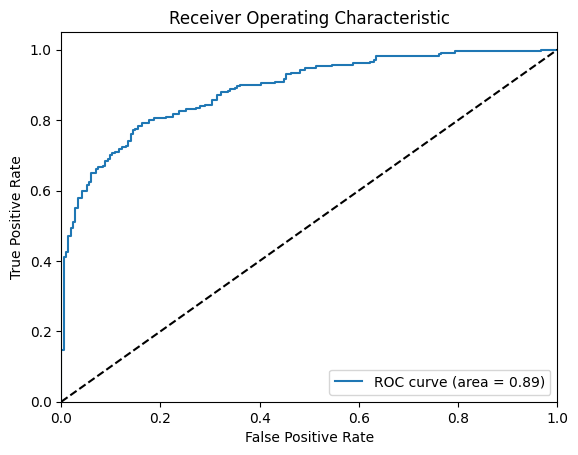

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = pipeline.predict_proba(X_test)[:, 1]

if len(lb.classes_) == 2:  # Only if it's a binary classification problem
    print("\nROC AUC Score:", roc_auc_score(y_test_bin, y_pred_bin))

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Preprocess the data using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['word_count', 'unique_word_count', 'mean_word_length']),
        ('text', TfidfVectorizer(), 'lemmas')
    ])

# Define the classifier
classifier = MultinomialNB()

# Combine the preprocessor and the classifier into a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Extract the features and the target variable
X = df.drop('predicted_topic', axis=1)
y = df['predicted_topic']

# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Decode the predictions
y_pred_decoded = encoder.inverse_transform(y_pred)

# Decode the true labels
y_test_decoded = encoder.inverse_transform(y_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded))

Accuracy: 0.5797752808988764

Classification Report:
                  precision    recall  f1-score   support

FinanceAnalysis       0.55      0.76      0.64       214
     HomeRetail       0.65      0.41      0.50       231

       accuracy                           0.58       445
      macro avg       0.60      0.59      0.57       445
   weighted avg       0.60      0.58      0.57       445



In [51]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[163  51]
 [136  95]]


In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print("\nCross Validation Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))


Cross Validation Score: 0.57 +/- 0.09



ROC AUC Score: 0.6070922846623781


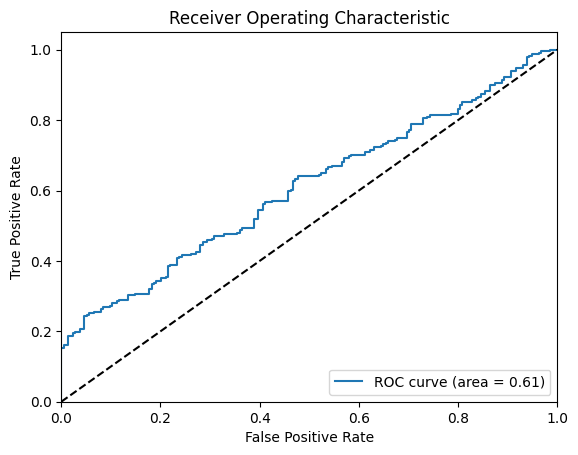

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = pipeline.predict_proba(X_test)[:, 1]

if len(lb.classes_) == 2:  # Only if it's a binary classification problem
    print("\nROC AUC Score:", roc_auc_score(y_test_bin, y_pred_bin))

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Using count vectorizer

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Preprocess the data using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['word_count', 'unique_word_count', 'mean_word_length']),
        ('text', CountVectorizer(), 'lemmas')
    ])

# Define the classifier
classifier = MultinomialNB()

# Combine the preprocessor and the classifier into a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Extract the features and the target variable
X = df.drop('predicted_topic', axis=1)
y = df['predicted_topic']

# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Decode the predictions
y_pred_decoded = encoder.inverse_transform(y_pred)

# Decode the true labels
y_test_decoded = encoder.inverse_transform(y_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded))

Accuracy: 0.7213483146067415

Classification Report:
                  precision    recall  f1-score   support

FinanceAnalysis       0.76      0.62      0.68       214
     HomeRetail       0.70      0.81      0.75       231

       accuracy                           0.72       445
      macro avg       0.73      0.72      0.72       445
   weighted avg       0.73      0.72      0.72       445



In [56]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[133  81]
 [ 43 188]]


In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print("\nCross Validation Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))


Cross Validation Score: 0.61 +/- 0.09



ROC AUC Score: 0.796304163126593


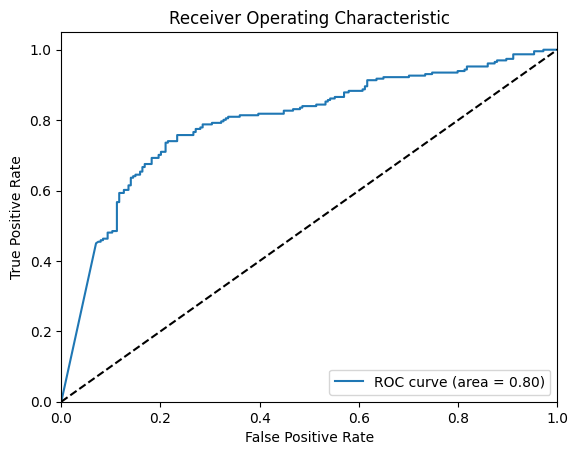

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = pipeline.predict_proba(X_test)[:, 1]

if len(lb.classes_) == 2:  # Only if it's a binary classification problem
    print("\nROC AUC Score:", roc_auc_score(y_test_bin, y_pred_bin))

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

### Deep Learning Models 

In [59]:
#drop unwanted columns
df.drop(['Date', 'Link', 'Title', 'Source', 'Article', 'tokens_column', 'word_count', 'unique_word_count','mean_word_length'],axis=1,inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   lemmas           2224 non-null   object
 1   predicted_topic  2224 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [62]:
#create input and output vectors 
X = df.lemmas
Y = df.predicted_topic
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [63]:
#splitinto training and test dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [64]:
from tensorflow import keras
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [65]:
# Assuming X_train is your training dataset
tok = Tokenizer()
tok.fit_on_texts(X_train)

# Get the number of unique words
vocab_size = len(tok.word_index)
print(f"Vocabulary size: {vocab_size}")

# Calculate the cumulative percentage of words captured by a certain max_words value
max_words = 25000
cumulative_percentage = sum(tok.word_counts[word] for word, idx in tok.word_index.items() if idx <= max_words) / sum(tok.word_counts.values())
print(f"Cumulative percentage of words captured by max_words={max_words}: {cumulative_percentage * 100:.2f}%")


Vocabulary size: 57017
Cumulative percentage of words captured by max_words=25000: 96.42%


In [66]:
max_words = 15000
embedding_dim = 50
# Calculate max_len based on the 95th percentile of article lengths
article_lengths = [len(article.split()) for article in X_train]
max_len = int(np.percentile(article_lengths, 95))
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

Recurrent Neural Network 

In [67]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [68]:
#Call the function and compile the model.

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 1234)]            0         
                                                                 
 embedding (Embedding)       (None, 1234, 50)          750000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [69]:
#Fit on the training data.

history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,) #callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]

# Preprocess the test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

# Evaluate the model on the training and test sets
train_accuracy = model.evaluate(sequences_matrix, Y_train)[1]
test_accuracy = model.evaluate(test_sequences_matrix, Y_test)[1]

# Print training, validation, and test accuracies
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Validation Accuracy: {:.2f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy: {:.2f}".format(test_accuracy))

Epoch 1/10
12/12 [==============================] - 100s 7s/step - loss: 0.6916 - accuracy: 0.5919 - val_loss: 0.6521 - val_accuracy: 0.6667
Epoch 2/10
12/12 [==============================] - 93s 8s/step - loss: 0.5929 - accuracy: 0.7474 - val_loss: 0.5677 - val_accuracy: 0.7275
Epoch 3/10
12/12 [==============================] - 96s 8s/step - loss: 0.4855 - accuracy: 0.7903 - val_loss: 0.5401 - val_accuracy: 0.7407
Epoch 4/10
12/12 [==============================] - 87s 7s/step - loss: 0.3765 - accuracy: 0.8571 - val_loss: 0.5226 - val_accuracy: 0.7593
Epoch 5/10
12/12 [==============================] - 83s 7s/step - loss: 0.3222 - accuracy: 0.8638 - val_loss: 0.5223 - val_accuracy: 0.7566
Epoch 6/10
12/12 [==============================] - 82s 7s/step - loss: 0.2407 - accuracy: 0.9054 - val_loss: 0.5535 - val_accuracy: 0.7698
Epoch 7/10
12/12 [==============================] - 99s 8s/step - loss: 0.2439 - accuracy: 0.9101 - val_loss: 0.5637 - val_accuracy: 0.7487
Epoch 8/10
12/12 [=

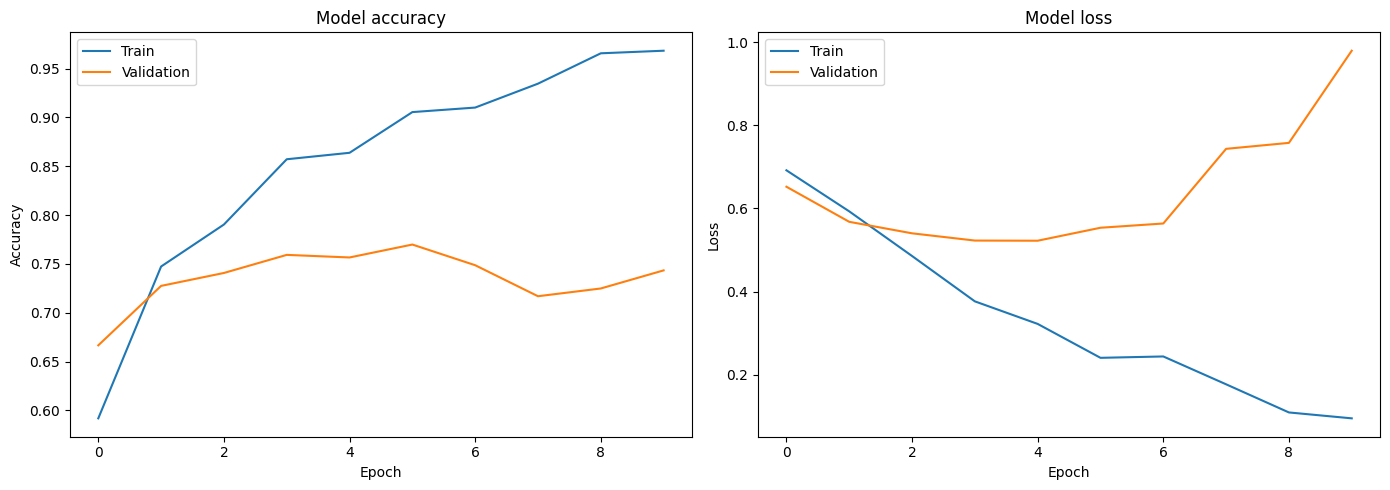

In [70]:
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(test_sequences_matrix).round()  # round to get 0 or 1

print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))


11/11 [==============================] - 9s 574ms/step
Precision: 0.7754010695187166
Recall: 0.8333333333333334
F1 Score: 0.8033240997229917


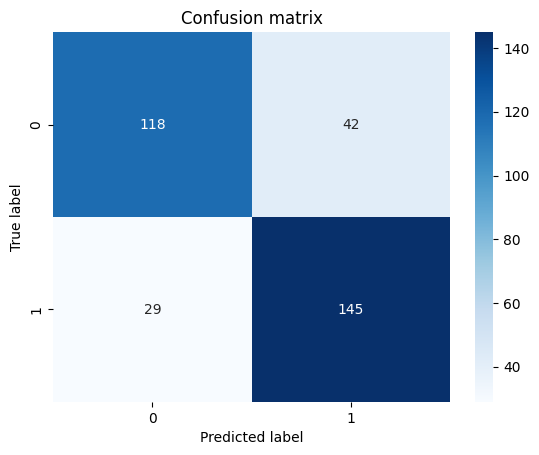

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()


BiRNN

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1234, 50)          750000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16128     
 l)                                                              
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [74]:
num_epochs = 10
history = model.fit(sequences_matrix, Y_train, epochs=num_epochs, batch_size=64, validation_split=0.2)

# Preprocess the test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

# Evaluate the model on the training and test sets
train_accuracy = model.evaluate(sequences_matrix, Y_train)[1]
test_accuracy = model.evaluate(test_sequences_matrix, Y_test)[1]

# Print training, validation, and test accuracies
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Validation Accuracy: {:.2f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy: {:.2f}".format(test_accuracy))

Epoch 1/10
24/24 [==============================] - 88s 3s/step - loss: 2.3616 - accuracy: 0.5933 - val_loss: 2.2089 - val_accuracy: 0.4894
Epoch 2/10
24/24 [==============================] - 58s 2s/step - loss: 1.9503 - accuracy: 0.6845 - val_loss: 1.8954 - val_accuracy: 0.4894
Epoch 3/10
24/24 [==============================] - 60s 3s/step - loss: 1.5415 - accuracy: 0.8003 - val_loss: 1.6130 - val_accuracy: 0.4921
Epoch 4/10
24/24 [==============================] - 55s 2s/step - loss: 1.1039 - accuracy: 0.8968 - val_loss: 1.3604 - val_accuracy: 0.5688
Epoch 5/10
24/24 [==============================] - 55s 2s/step - loss: 0.8746 - accuracy: 0.9253 - val_loss: 2.6146 - val_accuracy: 0.4894
Epoch 6/10
24/24 [==============================] - 51s 2s/step - loss: 0.6533 - accuracy: 0.9213 - val_loss: 2.2889 - val_accuracy: 0.4894
Epoch 7/10
24/24 [==============================] - 49s 2s/step - loss: 0.4570 - accuracy: 0.9464 - val_loss: 1.2733 - val_accuracy: 0.4921
Epoch 8/10
24/24 [==

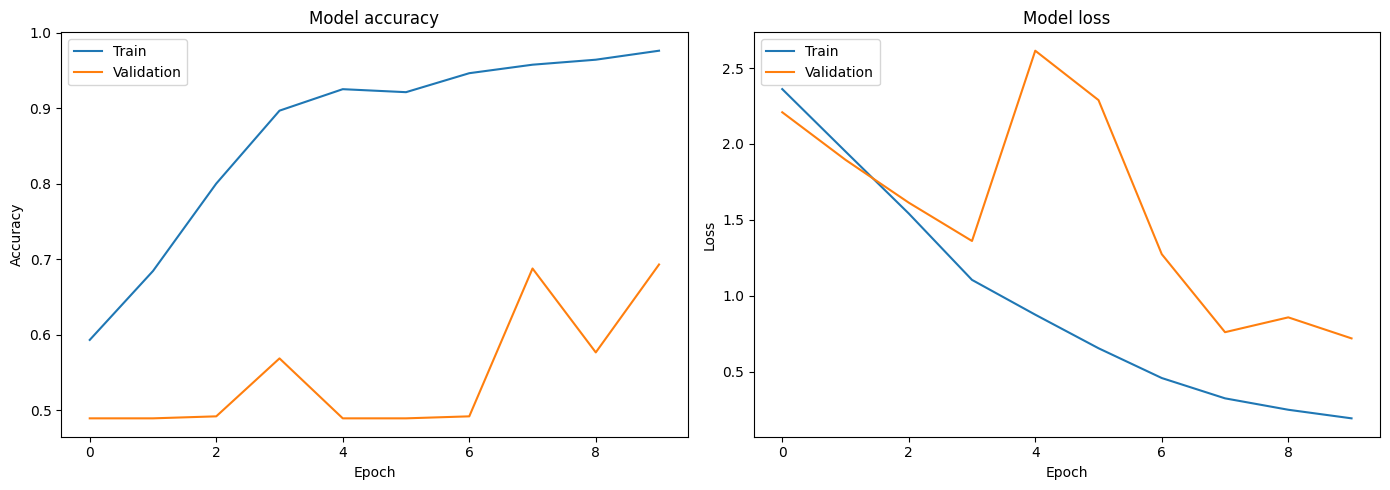

In [75]:
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(test_sequences_matrix).round()  # round to get 0 or 1

print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

11/11 [==============================] - 6s 315ms/step
Precision: 0.9
Recall: 0.46551724137931033
F1 Score: 0.6136363636363636


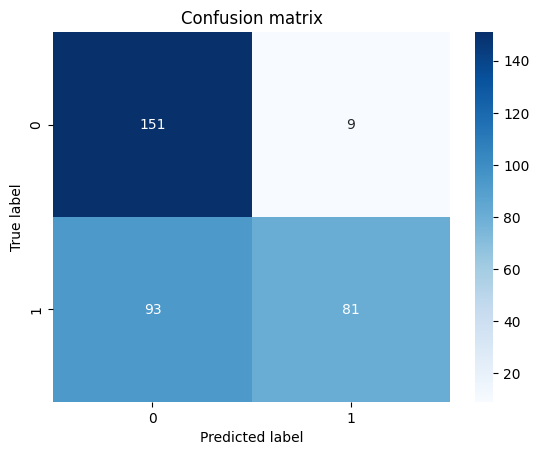

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

Optimisation with L2 Ridge Regularization

In [78]:
# Model Definition with BiRNN (GRU)
# with L2 Ridge Regularization
# Dropout, for robustness of recurrent neural networks
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1234, 50)          750000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16128     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [79]:
num_epochs = 10
history = model.fit(sequences_matrix, Y_train, epochs=num_epochs, batch_size=64, validation_split=0.2)

# Preprocess the test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

# Evaluate the model on the training and test sets
train_accuracy = model.evaluate(sequences_matrix, Y_train)[1]
test_accuracy = model.evaluate(test_sequences_matrix, Y_test)[1]

# Print training, validation, and test accuracies
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Validation Accuracy: {:.2f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy: {:.2f}".format(test_accuracy))

Epoch 1/10
24/24 [==============================] - 72s 2s/step - loss: 0.8866 - accuracy: 0.5946 - val_loss: 0.8894 - val_accuracy: 0.6243
Epoch 2/10
24/24 [==============================] - 47s 2s/step - loss: 0.7644 - accuracy: 0.6812 - val_loss: 0.8542 - val_accuracy: 0.5000
Epoch 3/10
24/24 [==============================] - 46s 2s/step - loss: 0.6211 - accuracy: 0.7791 - val_loss: 0.8274 - val_accuracy: 0.4974
Epoch 4/10
24/24 [==============================] - 48s 2s/step - loss: 0.4369 - accuracy: 0.8856 - val_loss: 0.8047 - val_accuracy: 0.4921
Epoch 5/10
24/24 [==============================] - 47s 2s/step - loss: 0.3328 - accuracy: 0.9226 - val_loss: 0.7723 - val_accuracy: 0.5714
Epoch 6/10
24/24 [==============================] - 48s 2s/step - loss: 0.2554 - accuracy: 0.9411 - val_loss: 0.7427 - val_accuracy: 0.6323
Epoch 7/10
24/24 [==============================] - 50s 2s/step - loss: 0.2306 - accuracy: 0.9345 - val_loss: 0.7067 - val_accuracy: 0.6640
Epoch 8/10
24/24 [==

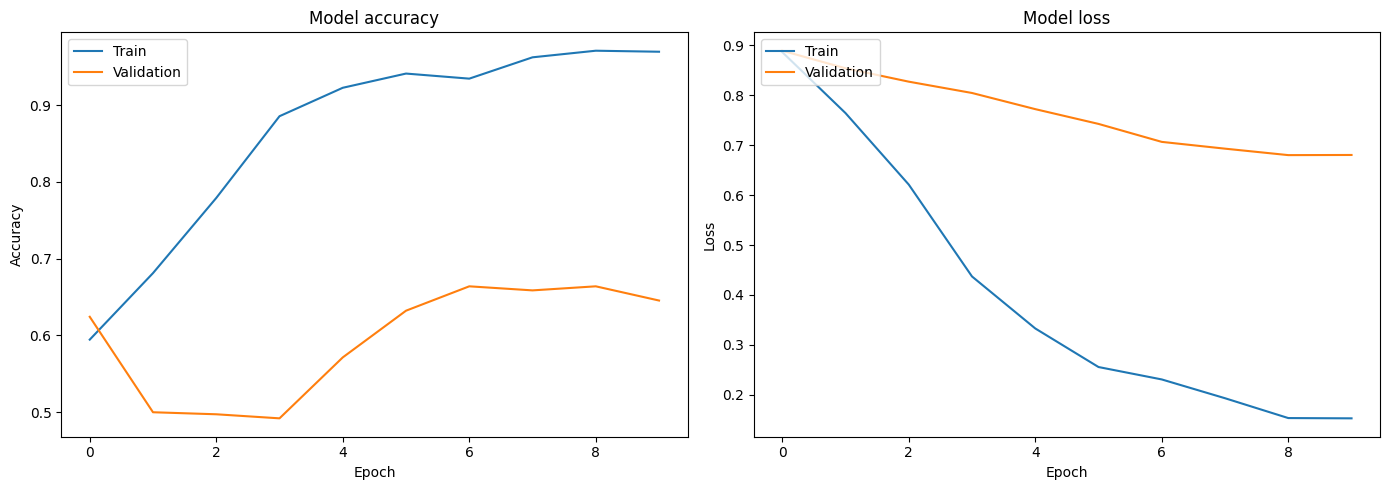

In [80]:
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(test_sequences_matrix).round()  # round to get 0 or 1

print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

11/11 [==============================] - 6s 309ms/step
Precision: 0.6141078838174274
Recall: 0.8505747126436781
F1 Score: 0.7132530120481927


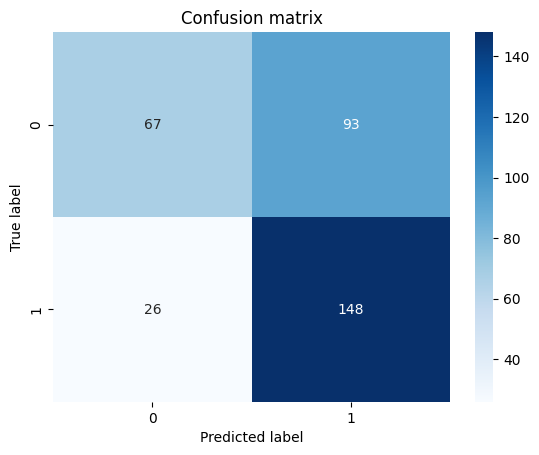

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

BiRNN with LSTM layer

In [83]:
# Model Definition with BiRNN (LSTM)
# with L1 Lasso Regularization, for feature selection
# Dropout, for robustness of recurrent neural networks
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1234, 50)          750000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               21248     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 100)               6500      
                                                                 
 batch_normalization_2 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [84]:
num_epochs = 10
history = model.fit(sequences_matrix, Y_train, epochs=num_epochs, batch_size=64, validation_split=0.2)

# Preprocess the test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

# Evaluate the model on the training and test sets
train_accuracy = model.evaluate(sequences_matrix, Y_train)[1]
test_accuracy = model.evaluate(test_sequences_matrix, Y_test)[1]

# Print training, validation, and test accuracies
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Validation Accuracy: {:.2f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy: {:.2f}".format(test_accuracy))

Epoch 1/10
24/24 [==============================] - 88s 3s/step - loss: 2.3371 - accuracy: 0.5860 - val_loss: 2.1704 - val_accuracy: 0.4921
Epoch 2/10
24/24 [==============================] - 61s 3s/step - loss: 1.8211 - accuracy: 0.7659 - val_loss: 1.8237 - val_accuracy: 0.6429
Epoch 3/10
24/24 [==============================] - 58s 2s/step - loss: 1.3481 - accuracy: 0.8631 - val_loss: 1.5341 - val_accuracy: 0.6243
Epoch 4/10
24/24 [==============================] - 59s 2s/step - loss: 0.9712 - accuracy: 0.9226 - val_loss: 1.2913 - val_accuracy: 0.5503
Epoch 5/10
24/24 [==============================] - 60s 2s/step - loss: 0.6587 - accuracy: 0.9623 - val_loss: 1.0619 - val_accuracy: 0.6667
Epoch 6/10
24/24 [==============================] - 61s 3s/step - loss: 0.4572 - accuracy: 0.9696 - val_loss: 0.9210 - val_accuracy: 0.6005
Epoch 7/10
24/24 [==============================] - 61s 3s/step - loss: 0.3078 - accuracy: 0.9788 - val_loss: 0.7630 - val_accuracy: 0.7249
Epoch 8/10
24/24 [==

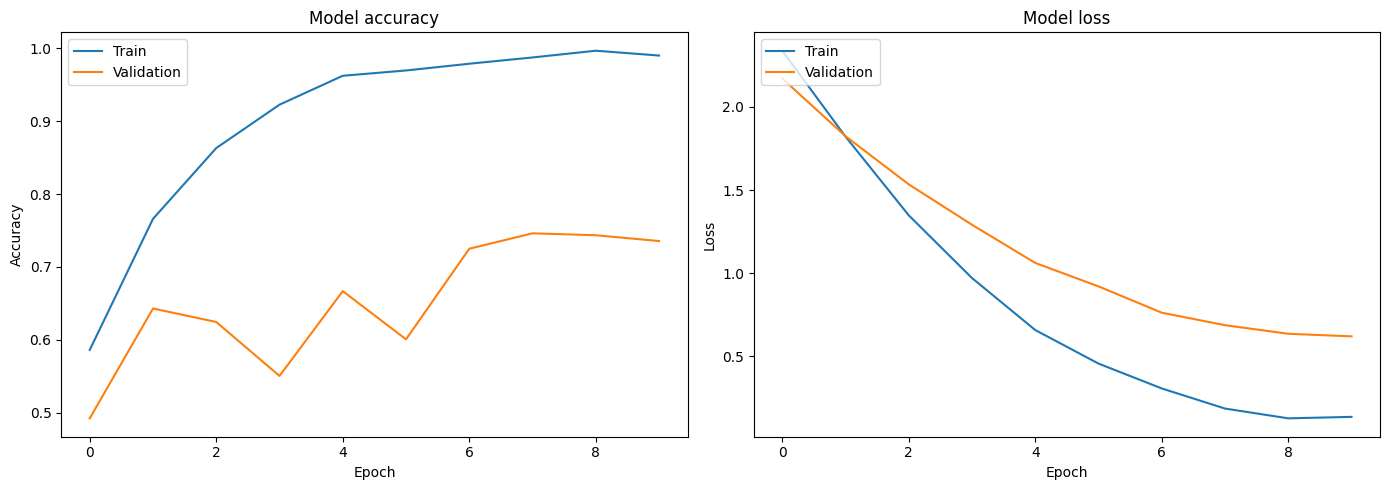

In [85]:
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(test_sequences_matrix).round()  # round to get 0 or 1

print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

11/11 [==============================] - 8s 416ms/step
Precision: 0.803680981595092
Recall: 0.7528735632183908
F1 Score: 0.7774480712166172


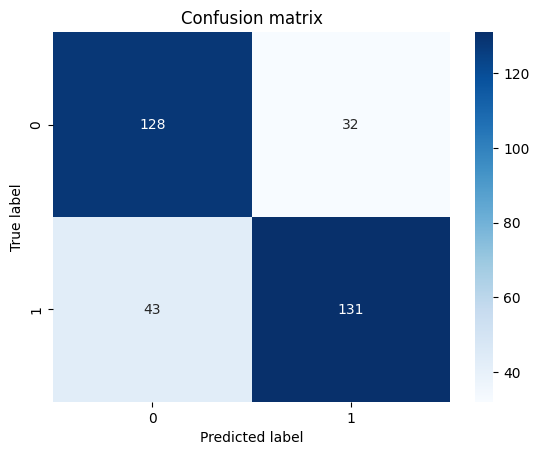

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

Optimisation with L2 Ridge Regularization

In [88]:
# Model Definition with BiRNN (LSTM)
# with L2 Ridge Regularization
# Dropout, for robustness of recurrent neural networks
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1234, 50)          750000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               21248     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 100)               6500      
                                                                 
 batch_normalization_3 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [89]:
num_epochs = 10
history = model.fit(sequences_matrix, Y_train, epochs=num_epochs, batch_size=64, validation_split=0.2)

# Preprocess the test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

# Evaluate the model on the training and test sets
train_accuracy = model.evaluate(sequences_matrix, Y_train)[1]
test_accuracy = model.evaluate(test_sequences_matrix, Y_test)[1]

# Print training, validation, and test accuracies
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Validation Accuracy: {:.2f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy: {:.2f}".format(test_accuracy))

Epoch 1/10
24/24 [==============================] - 182s 7s/step - loss: 0.8726 - accuracy: 0.6124 - val_loss: 0.8853 - val_accuracy: 0.4947
Epoch 2/10
24/24 [==============================] - 154s 6s/step - loss: 0.6815 - accuracy: 0.7566 - val_loss: 0.8421 - val_accuracy: 0.5079
Epoch 3/10
24/24 [==============================] - 154s 6s/step - loss: 0.4852 - accuracy: 0.8737 - val_loss: 0.8151 - val_accuracy: 0.4947
Epoch 4/10
24/24 [==============================] - 159s 7s/step - loss: 0.3322 - accuracy: 0.9206 - val_loss: 0.7658 - val_accuracy: 0.6508
Epoch 5/10
24/24 [==============================] - 171s 7s/step - loss: 0.2338 - accuracy: 0.9524 - val_loss: 0.7441 - val_accuracy: 0.5926
Epoch 6/10
24/24 [==============================] - 159s 7s/step - loss: 0.1713 - accuracy: 0.9802 - val_loss: 0.6774 - val_accuracy: 0.7407
Epoch 7/10
24/24 [==============================] - 162s 7s/step - loss: 0.1330 - accuracy: 0.9835 - val_loss: 0.6981 - val_accuracy: 0.6905
Epoch 8/10
24

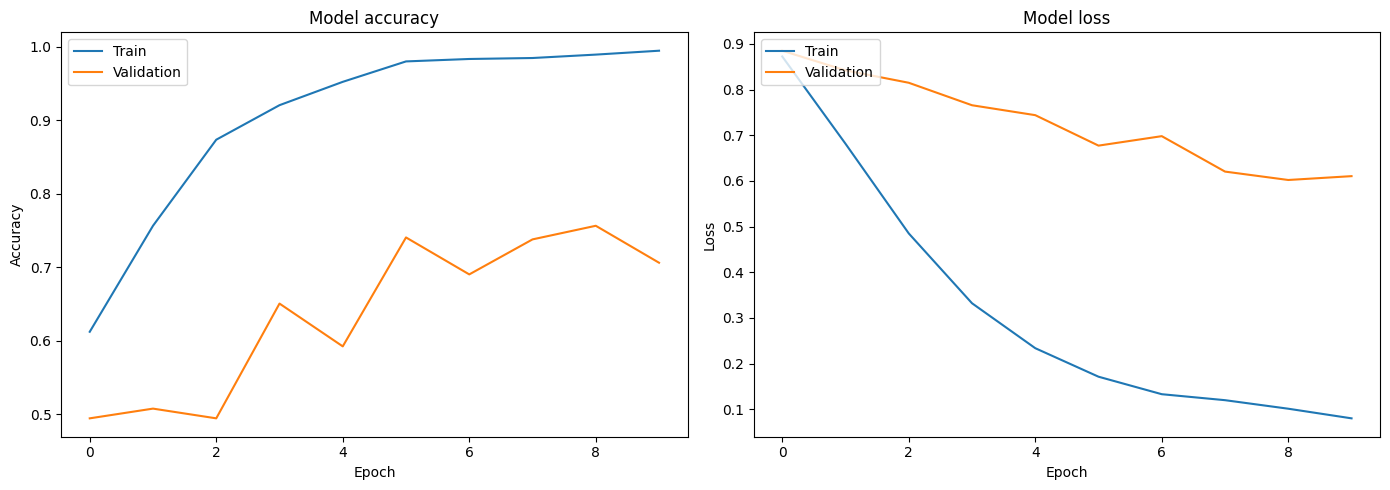

In [90]:
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(test_sequences_matrix).round()  # round to get 0 or 1

print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

11/11 [==============================] - 13s 909ms/step
Precision: 0.7170731707317073
Recall: 0.8448275862068966
F1 Score: 0.7757255936675462


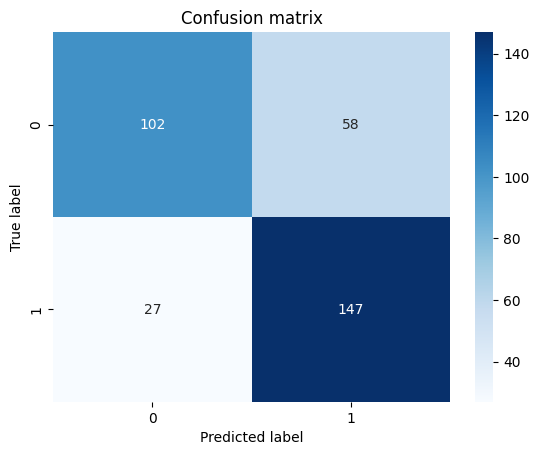

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

Convolutional neural network

In [93]:
# Model Definition with CNN (Conv1D)
# with L1 Lasso Regularization, for feature selection
# Dropout, for robustness
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1234, 50)          750000    
                                                                 
 conv1d (Conv1D)             (None, 1230, 128)         32128     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_8 (Dense)             (None, 100)               12900     
                                                                 
 batch_normalization_4 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 100)              

In [94]:
num_epochs = 10
history = model.fit(sequences_matrix, Y_train, epochs=num_epochs, batch_size=64, validation_split=0.2)

# Preprocess the test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

# Evaluate the model on the training and test sets
train_accuracy = model.evaluate(sequences_matrix, Y_train)[1]
test_accuracy = model.evaluate(test_sequences_matrix, Y_test)[1]

# Print training, validation, and test accuracies
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Validation Accuracy: {:.2f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy: {:.2f}".format(test_accuracy))

Epoch 1/10
24/24 [==============================] - 32s 1s/step - loss: 3.4270 - accuracy: 0.5767 - val_loss: 3.0209 - val_accuracy: 0.4894
Epoch 2/10
24/24 [==============================] - 24s 1s/step - loss: 2.6183 - accuracy: 0.6733 - val_loss: 2.3450 - val_accuracy: 0.5079
Epoch 3/10
24/24 [==============================] - 25s 1s/step - loss: 1.8873 - accuracy: 0.7798 - val_loss: 1.8131 - val_accuracy: 0.4894
Epoch 4/10
24/24 [==============================] - 24s 990ms/step - loss: 1.2690 - accuracy: 0.8565 - val_loss: 1.3974 - val_accuracy: 0.5159
Epoch 5/10
24/24 [==============================] - 23s 964ms/step - loss: 0.8099 - accuracy: 0.9087 - val_loss: 1.0968 - val_accuracy: 0.6058
Epoch 6/10
24/24 [==============================] - 23s 964ms/step - loss: 0.5089 - accuracy: 0.9517 - val_loss: 0.9048 - val_accuracy: 0.6587
Epoch 7/10
24/24 [==============================] - 23s 970ms/step - loss: 0.3507 - accuracy: 0.9563 - val_loss: 0.8219 - val_accuracy: 0.6640
Epoch 8/

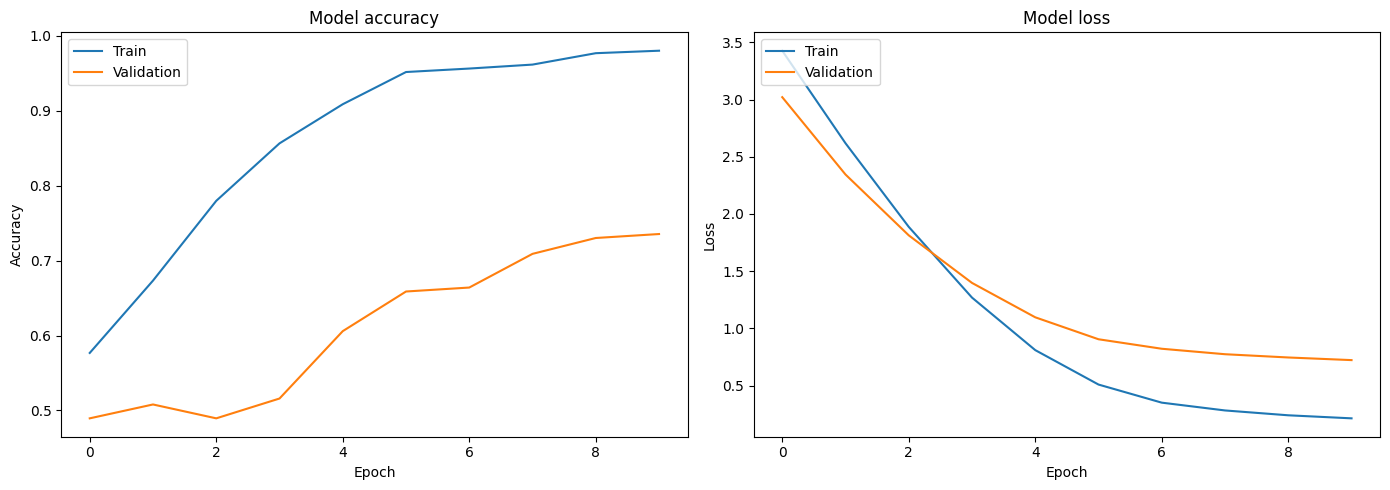

In [95]:
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(test_sequences_matrix).round()  # round to get 0 or 1

print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

11/11 [==============================] - 2s 137ms/step
Precision: 0.6837209302325581
Recall: 0.8448275862068966
F1 Score: 0.7557840616966581


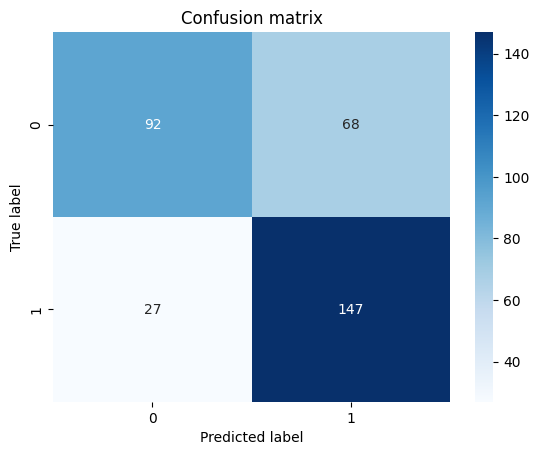

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

Optimisation with L2 Ridge Regularization

In [98]:
# Model Definition with CNN (Conv1D)
# with L2 Ridge Regularization
# Dropout, for robustness
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1234, 50)          750000    
                                                                 
 conv1d_1 (Conv1D)           (None, 1230, 128)         32128     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_10 (Dense)            (None, 100)               12900     
                                                                 
 batch_normalization_5 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 100)              

In [99]:
num_epochs = 10
history = model.fit(sequences_matrix, Y_train, epochs=num_epochs, batch_size=64, validation_split=0.2)

# Preprocess the test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

# Evaluate the model on the training and test sets
train_accuracy = model.evaluate(sequences_matrix, Y_train)[1]
test_accuracy = model.evaluate(test_sequences_matrix, Y_test)[1]

# Print training, validation, and test accuracies
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Validation Accuracy: {:.2f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy: {:.2f}".format(test_accuracy))

Epoch 1/10
24/24 [==============================] - 30s 974ms/step - loss: 0.9777 - accuracy: 0.5708 - val_loss: 0.9411 - val_accuracy: 0.4894
Epoch 2/10
24/24 [==============================] - 33s 1s/step - loss: 0.8074 - accuracy: 0.7004 - val_loss: 0.8722 - val_accuracy: 0.5079
Epoch 3/10
24/24 [==============================] - 22s 906ms/step - loss: 0.5920 - accuracy: 0.8049 - val_loss: 0.8231 - val_accuracy: 0.4947
Epoch 4/10
24/24 [==============================] - 21s 888ms/step - loss: 0.3864 - accuracy: 0.9074 - val_loss: 0.7820 - val_accuracy: 0.5185
Epoch 5/10
24/24 [==============================] - 21s 898ms/step - loss: 0.2655 - accuracy: 0.9358 - val_loss: 0.7463 - val_accuracy: 0.6217
Epoch 6/10
24/24 [==============================] - 22s 892ms/step - loss: 0.2028 - accuracy: 0.9597 - val_loss: 0.7275 - val_accuracy: 0.6111
Epoch 7/10
24/24 [==============================] - 22s 907ms/step - loss: 0.1808 - accuracy: 0.9676 - val_loss: 0.6968 - val_accuracy: 0.6693
Ep

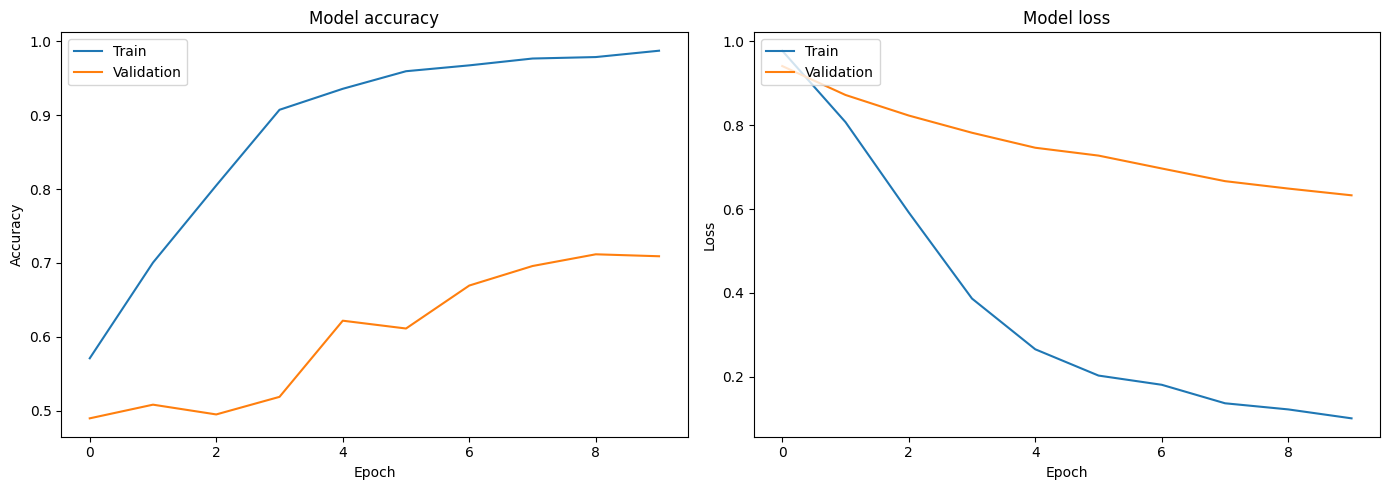

In [100]:
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [101]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(test_sequences_matrix).round()  # round to get 0 or 1

print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

11/11 [==============================] - 2s 133ms/step
Precision: 0.6727272727272727
Recall: 0.8505747126436781
F1 Score: 0.7512690355329948


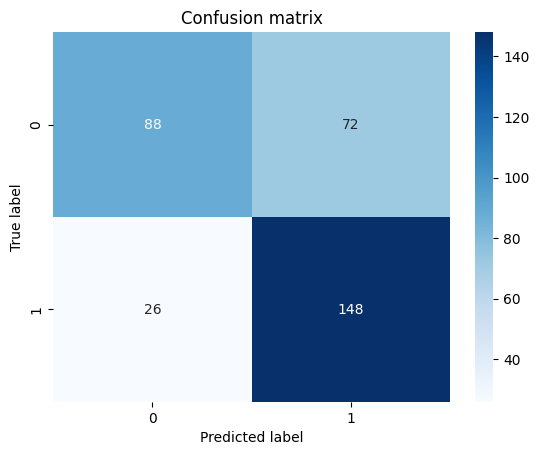

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

CNN-RNN combined architecture

In [103]:
# Model Definition with CNN (Conv1D)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
    tf.keras.layers.Conv1D(128, 1, activation='relu'),
    tf.keras.layers.MaxPooling1D(2, padding="same"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.005), activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.005), activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1234, 50)          750000    
                                                                 
 conv1d_2 (Conv1D)           (None, 1234, 128)         6528      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 617, 128)         0         
 )                                                               
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 100)               6500      
                                                                 
 dropout_7 (Dropout)         (None, 100)              

In [104]:
num_epochs = 10
history = model.fit(sequences_matrix, Y_train, epochs=num_epochs, batch_size=64, validation_split=0.2)

# Preprocess the test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

# Evaluate the model on the training and test sets
train_accuracy = model.evaluate(sequences_matrix, Y_train)[1]
test_accuracy = model.evaluate(test_sequences_matrix, Y_test)[1]

# Print training, validation, and test accuracies
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Validation Accuracy: {:.2f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy: {:.2f}".format(test_accuracy))

Epoch 1/10
24/24 [==============================] - 177s 7s/step - loss: 3.4847 - accuracy: 0.5119 - val_loss: 3.1087 - val_accuracy: 0.4894
Epoch 2/10
24/24 [==============================] - 152s 6s/step - loss: 2.7884 - accuracy: 0.5747 - val_loss: 2.4386 - val_accuracy: 0.6270
Epoch 3/10
24/24 [==============================] - 153s 6s/step - loss: 2.1260 - accuracy: 0.7401 - val_loss: 1.8573 - val_accuracy: 0.7037
Epoch 4/10
24/24 [==============================] - 163s 7s/step - loss: 1.5589 - accuracy: 0.8108 - val_loss: 1.3807 - val_accuracy: 0.7698
Epoch 5/10
24/24 [==============================] - 155s 6s/step - loss: 1.0807 - accuracy: 0.8843 - val_loss: 1.1007 - val_accuracy: 0.7566
Epoch 6/10
24/24 [==============================] - 164s 7s/step - loss: 0.7557 - accuracy: 0.9094 - val_loss: 0.8964 - val_accuracy: 0.7566
Epoch 7/10
24/24 [==============================] - 174s 7s/step - loss: 0.5059 - accuracy: 0.9478 - val_loss: 0.8430 - val_accuracy: 0.7434
Epoch 8/10
24

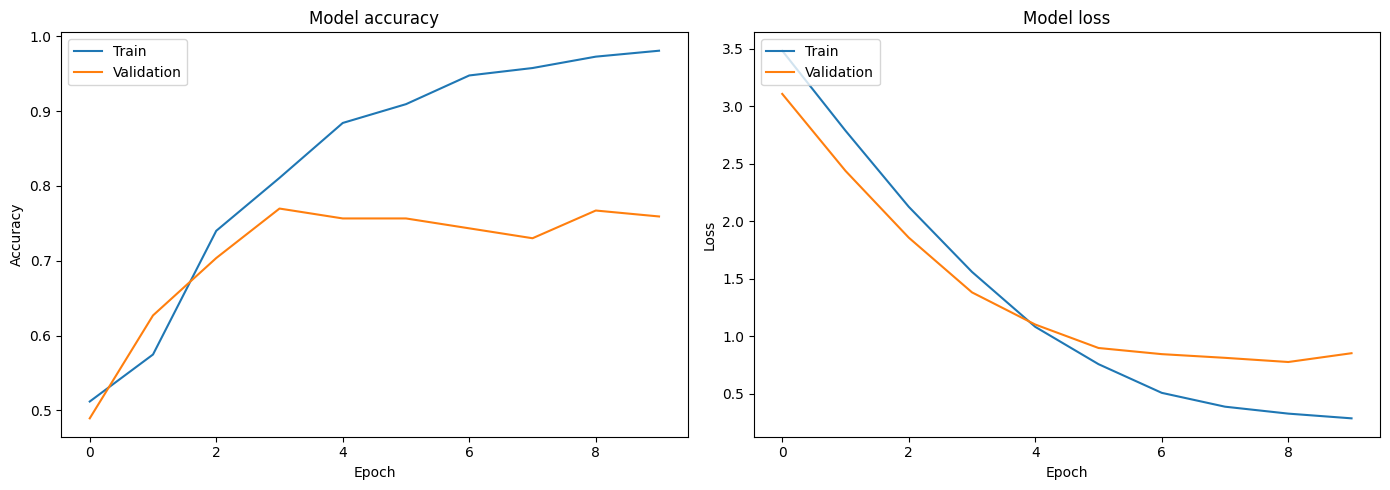

In [105]:
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [106]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(test_sequences_matrix).round()  # round to get 0 or 1

print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

11/11 [==============================] - 10s 616ms/step
Precision: 0.8300653594771242
Recall: 0.7298850574712644
F1 Score: 0.7767584097859328


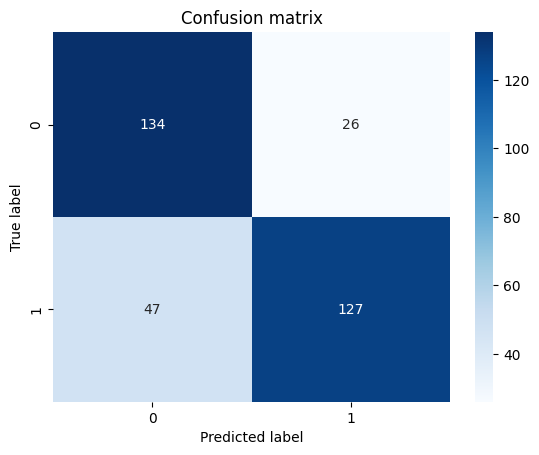

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

Optimisation with L2 Ridge Regularization

In [108]:
# Model Definition with CNN (Conv1D)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
    tf.keras.layers.Conv1D(128, 1, activation='relu'),
    tf.keras.layers.MaxPooling1D(2, padding="same"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.005), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.005), activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1234, 50)          750000    
                                                                 
 conv1d_3 (Conv1D)           (None, 1234, 128)         6528      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 617, 128)         0         
 1D)                                                             
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 100)               6500      
                                                                 
 batch_normalization_6 (Batc  (None, 100)             

In [109]:
num_epochs = 10
history = model.fit(sequences_matrix, Y_train, epochs=num_epochs, batch_size=64, validation_split=0.2)

# Preprocess the test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

# Evaluate the model on the training and test sets
train_accuracy = model.evaluate(sequences_matrix, Y_train)[1]
test_accuracy = model.evaluate(test_sequences_matrix, Y_test)[1]

# Print training, validation, and test accuracies
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Validation Accuracy: {:.2f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy: {:.2f}".format(test_accuracy))

Epoch 1/10
24/24 [==============================] - 156s 6s/step - loss: 0.9987 - accuracy: 0.6204 - val_loss: 0.9900 - val_accuracy: 0.4894
Epoch 2/10
24/24 [==============================] - 131s 5s/step - loss: 0.7274 - accuracy: 0.7917 - val_loss: 0.9048 - val_accuracy: 0.4921
Epoch 3/10
24/24 [==============================] - 126s 5s/step - loss: 0.4669 - accuracy: 0.9008 - val_loss: 0.8469 - val_accuracy: 0.5026
Epoch 4/10
24/24 [==============================] - 142s 6s/step - loss: 0.3157 - accuracy: 0.9451 - val_loss: 0.7782 - val_accuracy: 0.5767
Epoch 5/10
24/24 [==============================] - 135s 6s/step - loss: 0.2020 - accuracy: 0.9709 - val_loss: 0.7121 - val_accuracy: 0.7302
Epoch 6/10
24/24 [==============================] - 136s 6s/step - loss: 0.1535 - accuracy: 0.9861 - val_loss: 0.7317 - val_accuracy: 0.5688
Epoch 7/10
24/24 [==============================] - 148s 6s/step - loss: 0.1031 - accuracy: 0.9960 - val_loss: 0.7130 - val_accuracy: 0.5661
Epoch 8/10
24

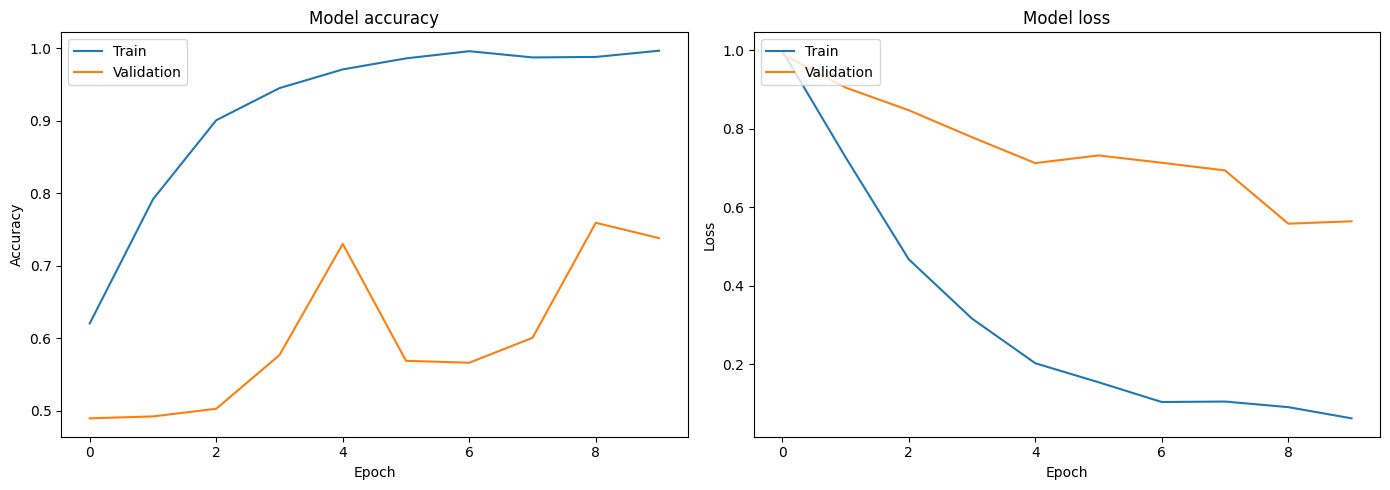

In [110]:
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(test_sequences_matrix).round()  # round to get 0 or 1

print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

11/11 [==============================] - 6s 317ms/step
Precision: 0.793939393939394
Recall: 0.7528735632183908
F1 Score: 0.7728613569321534


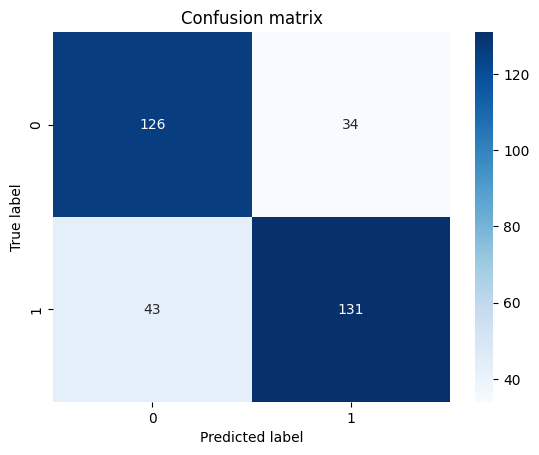

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()